# Voting Regression

In [1]:

from sklearn.datasets import load_boston
import numpy as np
     

In [3]:
X,y=load_boston(return_X_y=True)

c:\Users\Abhishek\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include 

In [4]:
X.shape

(506, 13)

In [5]:
y.shape

(506,)

In [6]:
X

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [7]:

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

In [8]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=2)

In [9]:
X.shape

(1000, 20)

In [10]:
y.shape

(1000,)

In [11]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from matplotlib import pyplot

In [12]:
def get_dataset():
 X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=2)
 return X, y

In [25]:
def get_voting():

  models=[]
  models.append(('knn1',KNeighborsClassifier(n_neighbors=1)))
  models.append(('knn2',KNeighborsClassifier(n_neighbors=2)))
  models.append(('knn3',KNeighborsClassifier(n_neighbors=3)))
  models.append(('knn4',KNeighborsClassifier(n_neighbors=4)))
  models.append(('knn5',KNeighborsClassifier(n_neighbors=5)))

  ensemble=VotingClassifier(estimators=models,voting='hard')

  return ensemble

In [26]:
def get_models():
  models=dict()
  models = dict()
  models['knn1'] = KNeighborsClassifier(n_neighbors=1)
  models['knn2'] = KNeighborsClassifier(n_neighbors=3)
  models['knn3'] = KNeighborsClassifier(n_neighbors=5)
  models['knn4'] = KNeighborsClassifier(n_neighbors=7)
  models['knn5'] = KNeighborsClassifier(n_neighbors=9)

  models['hard_voting'] = get_voting()

  return models




In [27]:
def evaluate_model(model, X, y):
 cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
 scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
 return scores

In [28]:
X, y = get_dataset()

In [29]:
models = get_models()

In [30]:
results, names = list(), list()
for name, model in models.items():
 scores = evaluate_model(model, X, y)
 results.append(scores)
 names.append(name)
 print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>knn1 0.873 (0.030)
>knn2 0.889 (0.038)
>knn3 0.895 (0.031)
>knn4 0.899 (0.035)
>knn5 0.900 (0.033)
>hard_voting 0.892 (0.033)


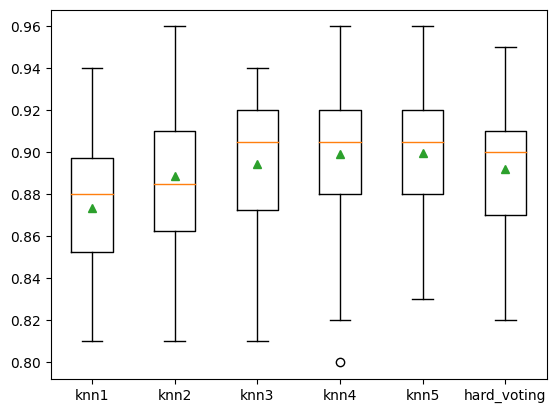

In [31]:
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [32]:
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=2)


In [33]:
models = list()
models.append(('knn1', KNeighborsClassifier(n_neighbors=1)))
models.append(('knn3', KNeighborsClassifier(n_neighbors=3)))
models.append(('knn5', KNeighborsClassifier(n_neighbors=5)))
models.append(('knn7', KNeighborsClassifier(n_neighbors=7)))
models.append(('knn9', KNeighborsClassifier(n_neighbors=9)))

In [34]:
ensemble = VotingClassifier(estimators=models, voting='hard')

In [35]:
ensemble.fit(X, y)

VotingClassifier(estimators=[('knn1', KNeighborsClassifier(n_neighbors=1)),
                             ('knn3', KNeighborsClassifier(n_neighbors=3)),
                             ('knn5', KNeighborsClassifier()),
                             ('knn7', KNeighborsClassifier(n_neighbors=7)),
                             ('knn9', KNeighborsClassifier(n_neighbors=9))])

In [36]:
data = [[5.88891819,2.64867662,-0.42728226,-1.24988856,-0.00822,-3.57895574,2.87938412,-1.55614691,-0.38168784,7.50285659,-1.16710354,-5.02492712,-0.46196105,-0.64539455,-1.71297469,0.25987852,-0.193401,-5.52022952,0.0364453,-1.960039]]
yhat = ensemble.predict(data)
print('Predicted Class: %d' % (yhat))

Predicted Class: 1
